 **Team member 1 : 
  Mohamed Orabi  40-20454   T-04**

**Team member 2 : 
  Mahmoud Hashem 40-15477   T-04**

# Problem 1

In [30]:
import cv2
import matplotlib.pyplot as plt

**Implementation of key points detection in SIFT algorithem**

In [31]:
#import cv2 as cv
from skimage import color
import math
from scipy import ndimage, misc

dict = {}
def SIFT (image , MaxS , t):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = gray.astype(float) / 255
  threshold = t
  log_function(gray ,1 , MaxS)
  marks , sigma_best , image = draw(t , image)
  return marks , sigma_best , image

def log_function (gray , sigma , maxS):
  if(sigma > maxS):
    return
  log = ndimage.gaussian_laplace(gray, sigma)
  log[log < 0] *= -1  
  squared = sigma**2
  dict[sigma] = log*squared
  log_function(gray , sigma+1 , maxS)


def check_key (index , value, row , col , abs_t , log_value):
  
  if(index ==1 or index == 20):
    return False

  cur = dict.get(index)
  above = dict.get(index+1)
  below = dict.get(index-1)
  threshold = abs_t *2
  if(log_value <= threshold):
    return False
  i = -1
  while (i < 2):
    j = -1
    while (j < 2):
      if(cur[row+i][col+j] >= value ):
        return False
      j += 1
      if(i ==0 and j == 0):
        j +=1
    i += 1

  i = -1
  while (i < 2):
    j = -1
    while (j < 2):
      if(above[row+i][col+j] >= value ):
        return False
      j += 1
    i += 1

  i = -1
  while (i < 2):
    j = -1
    while (j < 2):
      if(below[row+i][col+j] >= value ):
        return False
      j += 1
    i += 1
  return True


def mark_key(x , y , s , marks , sigma_best , image):
  marks.append([y,x])
  sigma_best.append([5 , [x,y]])
  cv2.circle(image, tuple([y,x]), math.ceil(math.sqrt(2)*s), (255, 0, 0), thickness=1, lineType=8, shift=0)
  return marks , sigma_best , image


def draw (threshold , image ):
  marks = []
  sigma_best = []
  rows =  image.shape[0]
  cols = image.shape[1]
  for i in range (1,rows-2):
    for j in range (1,cols -2):
      values = []
      for k in dict : 
        cur_log = dict[k]
        values.append(cur_log[i][j])
      flag = check_key(values.index(max(values ))+1 ,max(values) , i , j , threshold , round(max(values) , 2))
      if(flag):
        marks , sigma_best , image= mark_key(i , j , values.index(max(values))+1 , marks , sigma_best , image)
  return marks , sigma_best , image


# marks = []
# th = []
# sigma_best = []
# dict = {}
#SIFT(image , 20 , 0.0)

#plt.imshow(image)

# def log_function(gray , sigma):
#   if(sigma > 20):
#     return
#   gaussian = cv.GaussianBlur(gray,(0,0),sigma)
#   log = cv2.Laplacian(gaussian, cv2.CV_16S)
#   log = cv2.convertScaleAbs(log)
#   log[log >= 0] *= sigma
#   dict[sigma] = log
#   log_function(gray , sigma+1)

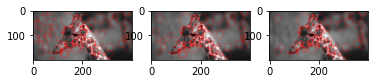

In [32]:
image1_1 = cv2.imread("/content/drive/MyDrive/image/Giraffe.jpg")
image1_2 = cv2.imread("/content/drive/MyDrive/image/Giraffe.jpg")
image1_3 = cv2.imread("/content/drive/MyDrive/image/Giraffe.jpg")
image2 = cv2.imread("/content/drive/MyDrive/image/Louvre1.jpg")
marks1 , sigma_best1 , image1_1 =  SIFT(image1_1 , 20 , 0.0)
marks2 , sigma_best2 , image1_2 =  SIFT(image1_2 , 20 , 0.01)
marks1 , sigma_best1 , image1_3 =  SIFT(image1_3 , 20 , 0.02)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(131)  # left side
ax2 = fig.add_subplot(132)  # right side
ax3 = fig.add_subplot(133)  # right side
ax1.imshow(image1_1)
ax2.imshow(image1_2)
ax3.imshow(image1_3)
plt.show()
#plt.imshow(image)

**Saving the 2 images resulted from convolving the giraffe image with log mask with segma = 1 and 5 respectively**

In [33]:
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("/content/drive/MyDrive/image/Giraffe.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = gray.astype(float) / 255

def log_function (gray , sigma , maxS):
  log = ndimage.gaussian_laplace(gray, sigma)
  log[log < 0] *= -1  
  return log*255

Giraffe_S1 = log_function(gray , 1 , 20)
Giraffe_S5 = log_function(gray , 5 , 20)

plt.imsave('Giraffe_S1.jpg', Giraffe_S1)
plt.imsave('Giraffe_S5.jpg', Giraffe_S5)



**Saving the 3 images of keypoints detection with different threshold**

In [34]:
from PIL import Image
im1 = Image.fromarray(image1_1)
im2 = Image.fromarray(image1_2)
im3 = Image.fromarray(image1_3)
im1.save("Giraffe_0.jpg")
im2.save("Giraffe_01.jpg")
im3.save("Giraffe_02.jpg")

# Problem 2
**import the required libraries and implement the stitch algorithem**

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
import math


def conv_sBest(image , sigma):
  rows =  image.shape[0]
  cols = image.shape[1]
  #gradient = [[0 for x in range(cols)] for y in range(rows)]
  gradient = np.zeros([rows,cols])
  gauss = gaussian_filter(image, sigma)
  kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
  edges_x = cv2.filter2D(image,cv2.CV_8U,kernelx)
  edges_y = cv2.filter2D(image,cv2.CV_8U,kernely)
  for i in range (0,rows-1):
    for j in range (0,cols -1):
      h1 = edges_x[i,j][0]
      h2 = edges_y[i,j][0]
      gradient[i][j] = math.degrees(math.atan(h2/h1))

  return gradient
  
def window16 (image , x , y):
  output = np.zeros([16,16])
  mid = 8
  for i in range (0,16):
    for j in range (0,16):
      value = image[x-mid+i][y-mid+j]
      output[i,j] = value
  return output

def window4 (win16):
  windows4X4 = []
  quar1 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar1[i,j] = win16[i][j]
  windows4X4.append(quar1)
  quar2 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar2[i,j] = win16[i][j+4]
  windows4X4.append(quar2)
  quar3 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar3[i,j] = win16[i][j+8]
  windows4X4.append(quar3)
  quar4 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar4[i,j] = win16[i][j+12]
  windows4X4.append(quar4)


  quar5 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar5[i,j] = win16[i+4][j]
  windows4X4.append(quar5)
  quar6 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar6[i,j] = win16[i+4][j+4]
  windows4X4.append(quar6)
  quar7 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar7[i,j] = win16[i+4][j+8]
  windows4X4.append(quar7)
  quar8 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar8[i,j] = win16[i+4][j+12]
  windows4X4.append(quar8)


  quar9 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar9[i,j] = win16[i+8][j]
  windows4X4.append(quar9)
  quar10 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar10[i,j] = win16[i+8][j+4]
  windows4X4.append(quar10)
  quar11 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar11[i,j] = win16[i+8][j+8]
  windows4X4.append(quar11)
  quar12 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar12[i,j] = win16[i+8][j+12]
  windows4X4.append(quar12)


  quar13 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar13[i,j] = win16[i+12][j]
  windows4X4.append(quar13)
  quar14 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar14[i,j] = win16[i+12][j+4]
  windows4X4.append(quar14)
  quar15 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar15[i,j] = win16[i+12][j+8]
  windows4X4.append(quar15)
  quar16 = np.zeros([4,4])
  for i in range (0,4):
    for j in range (0,4):
      quar16[i,j] = win16[i+12][j+12]
  windows4X4.append(quar16)
  return gen_histogram (windows4X4)
def gen_histogram (windows4X4):
  vector = []
  for w in range (0 , len(windows4X4)):
    win4 = windows4X4[w]
    hisogram = [0] * 8
    for i in range (0,4):
      for j in range (0,4):
        if(not math.isnan(win4[i][j])):
          index = math.floor(win4[i][j] // 45)
          hisogram[index] = hisogram[index]+1 
    vector.append(hisogram)
  vector = [item for sublist in vector for item in sublist]
  return vector

def gen_descriptor(gradient , x , y):
  win_16 = window16(gradient , x , y)
  keyPoint_vector = window4(win_16)
  return keyPoint_vector

def vectors_sim (v1 , v2):
  diff=0
  for i in range (0 , len(v1)):
    diff = diff + math.sqrt((v1[i]-v2[i])**2)
  return diff

def matching (dict1 , dict2):
  shift = []
  for i in range (0 , len(dict1)):
    vec_i = dict1[i][1]
    min = vectors_sim(dict1[i][1] , dict2[0][1])
    minPoint = dict2[0][0]
    for j in range (0, len(dict2)):
      vec_j = dict2[j][1]
      diff = vectors_sim(vec_i , vec_j)
      if(diff < min):
        min = diff
        minPoint = dict2[j][0]
        if(min == 0):
          return [a_i - b_i for a_i, b_i in zip(dict[i][0] - dict[j][0])]
    shift.append([a_i - b_i for a_i, b_i in zip(dict1[i][0], minPoint)])
  return shift



def stitch (image1 , image2):
  original1 = image1.copy()
  original2 = image2.copy()
  keypoints1 , sigma_best1 , image1 =  SIFT(image1 , 20 , 0.0)
  keypoints2 , sigma_best2 , image2 =  SIFT(image2 , 20 , 0.0)
  descriptorDict1 = []
  descriptorDict2 = []
  for i in range(0,len(sigma_best1)):
    sBest = sigma_best1[i][0]
    x , y = sigma_best1[i][1]
    gradient = conv_sBest(original1 , sBest)
    if( 8 < x < 166 and 8 < y < 392 ):
      descriptorDict1.append([[x,y] , gen_descriptor(gradient , x , y)])
  for i in range(0,len(sigma_best2)):
    sBest = sigma_best2[i][0]
    x , y = sigma_best2[i][1]
    gradient = conv_sBest(original2 , sBest)
    if( 8 < x < 166 and 8 < y < 392 ):
      descriptorDict2.append([[x,y] , gen_descriptor(gradient , x , y)])

  shifts = matching(descriptorDict1 , descriptorDict2)
  return shifts

**pass the 2 images to stitch algorithem and return the shift between each keypoint and its corresponding keypoint in the another image.**

In [7]:
image1 = cv2.imread("/content/drive/MyDrive/image/Louvre1.jpg")
image2 = cv2.imread("/content/drive/MyDrive/image/Louvre2.jpg")
shifts = stitch(image1 , image2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in ubyte_scalars


**stitch the 2 images based on the average of the shift between each pair of keypoints**

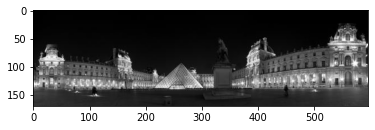

In [29]:
from PIL import Image

#shift = [[23, 204], [23, 204], [-18, -25], [23, 202], [23, 204], [38, -306], [23, 204], [34, -352], [22, 204], [23, 204], [13, -224], [24, 204], [61, -327], [-8, -68], [0, 332], [-1, -75], [-3, 331], [3, -292], [-9, 26], [9, -153], [11, -180], [-26, 138], [23, 204], [-3, 95], [10, -202], [-2, 97], [-3, 38], [2, 77], [32, -233], [-9, -247], [9, 82], [29, -166], [75, -316], [23, 204], [62, -164], [25, -282], [22, 204], [28, -263], [54, 37], [55, -112], [35, -158], [23, 204], [13, -67], [36, -235], [14, -149], [35, -137], [-10, 32], [22, -110], [8, 0], [71, -260], [15, 89], [23, 204], [23, 204], [72, -249], [24, -110], [19, -109], [64, -35], [69, 62], [25, 205], [21, -100], [22, -92], [23, 204], [23, 204], [23, 204], [80, -33], [0, 6], [24, 203], [23, 204], [23, 204], [-11, 287], [23, 204], [15, -229], [9, -135], [35, -161], [55, -46], [23, 204], [23, 204], [22, 205], [8, -177], [27, -141], [10, -243], [23, 204], [23, 204], [6, 190], [39, -334], [39, -251], [26, -5], [23, 204], [39, -345], [23, 205], [63, -345], [39, 25], [96, -335], [66, -224], [96, -249], [28, 17], [20, -120], [23, 204], [102, -192], [27, -261], [23, 204], [28, -122], [23, 204], [23, 204], [58, -263], [84, -115], [64, -222], [18, 53], [23, 203], [55, 29], [23, 204], [59, -296], [103, -245], [19, 124], [86, -204], [30, -69], [31, -130], [26, 13], [21, 177], [23, 204], [34, -261], [23, 204], [23, 204], [23, 204], [23, 204], [23, 204], [85, -204], [34, -204], [23, 204], [91, 25], [35, -39], [23, -142], [23, 131], [23, 204], [23, 204], [23, 204], [107, -269], [25, 14], [23, 157], [23, 203], [90, -25], [23, 203], [23, 204], [23, 204], [23, 204], [27, -72], [26, 14], [26, 30], [23, 204], [23, 204], [83, -190], [29, -31], [78, -173], [31, -26], [23, 204], [23, 204], [91, -322], [44, -56], [23, 204]]
x_values = [i[0] for i in shifts]
y_values = [i[1] for i in shifts]
abs_x = list(map(abs, x_values))
abs_y = list(map(abs, y_values))
shift_x = max(set(abs_x), key=abs_x.count) #sum(map(abs, x_values)) / len(x_values)
shift_y = max(set(abs_y), key=abs_y.count) #sum(map(abs, y_values)) / len(y_values

def merge_images(file1, file2, shift_x , shift_y):
    image1 = Image.open(file1)
    image2 = Image.open(file2)

    (width1, height1) = image1.size
    (width2, height2) = image2.size

    result_width = (width1 + width2) - shift_y
    result_height = max(height1, height2)

    result = Image.new('RGB', (result_width, result_height))
    result.paste(im=image1, box=(0, 0))
    result.paste(im=image2, box=(shift_y , shift_x))
    return result

stitched_image = merge_images("/content/drive/MyDrive/image/Louvre1.jpg" , "/content/drive/MyDrive/image/Louvre2.jpg" , shift_x , shift_y)
imgplot = plt.imshow(stitched_image)
stitched_image.save('Louvre_All.jpg')
plt.show()
